In [1]:
%pip install nba_api
%pip install scikit-learn
%pip install xgboost
%pip install seaborn
%pip install matplotlib
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\nadon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
from nba_api.stats.endpoints import	leaguegamelog
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from joblib import dump, load
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
gamelog = leaguegamelog.LeagueGameLog(season = '2022-23')
games = gamelog.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1610612738,BOS,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,240,46,...,30,36,24,8,3,11,24,126,9,1
1,22022,1610612755,PHI,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,240,40,...,27,31,16,8,3,14,25,117,-9,1
2,22022,1610612744,GSW,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,240,45,...,37,48,31,11,4,18,23,123,14,1
3,22022,1610612747,LAL,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,240,40,...,39,48,23,12,4,22,18,109,-14,1
4,22022,1610612753,ORL,Orlando Magic,0022200003,2022-10-19,ORL @ DET,L,240,42,...,38,48,21,5,5,18,24,109,-4,1


In [8]:
games.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [9]:
games = games[['TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'PLUS_MINUS']]

In [10]:
games

,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,PLUS_MINUS
0,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,9
1,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,-9
2,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,14
3,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,-14
4,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,2
...,...,...,...,...,...,...
1323,Houston Rockets,0022200664,2023-01-16,HOU @ LAL,L,-8
1324,Boston Celtics,0022200656,2023-01-16,BOS @ CHA,W,12
1325,Indiana Pacers,0022200657,2023-01-16,IND @ MIL,L,-13
1326,Milwaukee Bucks,0022200657,2023-01-16,MIL vs. IND,W,13


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM_NAME   1328 non-null   object
 1   GAME_ID     1328 non-null   object
 2   GAME_DATE   1328 non-null   object
 3   MATCHUP     1328 non-null   object
 4   WL          1328 non-null   object
 5   PLUS_MINUS  1328 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 62.4+ KB


In [12]:
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

In [13]:

games['GAME_DATE']

0      2022-10-18
1      2022-10-18
2      2022-10-18
3      2022-10-18
4      2022-10-19
          ...    
1323   2023-01-16
1324   2023-01-16
1325   2023-01-16
1326   2023-01-16
1327   2023-01-16
Name: GAME_DATE, Length: 1328, dtype: datetime64[ns]

In [14]:
games['avg_30_plus_minus'] = games.groupby('TEAM_NAME')['PLUS_MINUS'].transform(lambda x: x.rolling(30, closed='left').mean())

In [15]:
games

,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,PLUS_MINUS,avg_30_plus_minus
0,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,9,NaN
1,Philadelphia 76ers,0022200001,2022-10-18,PHI @ BOS,L,-9,NaN
2,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,14,NaN
3,Los Angeles Lakers,0022200002,2022-10-18,LAL @ GSW,L,-14,NaN
4,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,2,NaN
...,...,...,...,...,...,...,...
1323,Houston Rockets,0022200664,2023-01-16,HOU @ LAL,L,-8,-7.833333
1324,Boston Celtics,0022200656,2023-01-16,BOS @ CHA,W,12,6.566667
1325,Indiana Pacers,0022200657,2023-01-16,IND @ MIL,L,-13,-1.533333
1326,Milwaukee Bucks,0022200657,2023-01-16,MIL vs. IND,W,13,-0.666667


In [16]:
msk = games['MATCHUP'].str.contains('@')
games_away = games[msk]
games_home = games[~msk]

games_home.shape

(664, 7)

In [17]:
games_away.shape

(664, 7)

In [18]:

games_home

,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,PLUS_MINUS,avg_30_plus_minus
0,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,9,NaN
2,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,14,NaN
4,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,2,NaN
6,Atlanta Hawks,0022200005,2022-10-19,ATL vs. HOU,W,10,NaN
7,Detroit Pistons,0022200003,2022-10-19,DET vs. ORL,W,4,NaN
...,...,...,...,...,...,...,...
1319,Los Angeles Lakers,0022200664,2023-01-16,LAL vs. HOU,W,8,1.066667
1320,Memphis Grizzlies,0022200663,2023-01-16,MEM vs. PHX,W,30,6.900000
1321,Washington Wizards,0022200660,2023-01-16,WAS vs. GSW,L,-9,-1.100000
1322,Charlotte Hornets,0022200656,2023-01-16,CHA vs. BOS,L,-12,-6.966667


In [19]:
games_merged = pd.merge(games_home, games_away, on='GAME_ID', suffixes=('_home', '_away'))
games_merged

,TEAM_NAME_home,GAME_ID,GAME_DATE_home,MATCHUP_home,WL_home,PLUS_MINUS_home,avg_30_plus_minus_home,TEAM_NAME_away,GAME_DATE_away,MATCHUP_away,WL_away,PLUS_MINUS_away,avg_30_plus_minus_away
0,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,9,NaN,Philadelphia 76ers,2022-10-18,PHI @ BOS,L,-9,NaN
1,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,14,NaN,Los Angeles Lakers,2022-10-18,LAL @ GSW,L,-14,NaN
2,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,2,NaN,Dallas Mavericks,2022-10-19,DAL @ PHX,L,-2,NaN
3,Atlanta Hawks,0022200005,2022-10-19,ATL vs. HOU,W,10,NaN,Houston Rockets,2022-10-19,HOU @ ATL,L,-10,NaN
4,Detroit Pistons,0022200003,2022-10-19,DET vs. ORL,W,4,NaN,Orlando Magic,2022-10-19,ORL @ DET,L,-4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,Los Angeles Lakers,0022200664,2023-01-16,LAL vs. HOU,W,8,1.066667,Houston Rockets,2023-01-16,HOU @ LAL,L,-8,-7.833333
660,Memphis Grizzlies,0022200663,2023-01-16,MEM vs. PHX,W,30,6.900000,Phoenix Suns,2023-01-16,PHX @ MEM,L,-30,-1.500000
661,Washington Wizards,0022200660,2023-01-16,WAS vs. GSW,L,-9,-1.100000,Golden State Warriors,2023-01-16,GSW @ WAS,W,9,0.433333
662,Charlotte Hornets,0022200656,2023-01-16,CHA vs. BOS,L,-12,-6.966667,Boston Celtics,2023-01-16,BOS @ CHA,W,12,6.566667


In [20]:
games_merged['avg_30_plus_minus_diff'] = games_merged['avg_30_plus_minus_home'] - games_merged['avg_30_plus_minus_away']
games_merged

,TEAM_NAME_home,GAME_ID,GAME_DATE_home,MATCHUP_home,WL_home,PLUS_MINUS_home,avg_30_plus_minus_home,TEAM_NAME_away,GAME_DATE_away,MATCHUP_away,WL_away,PLUS_MINUS_away,avg_30_plus_minus_away,avg_30_plus_minus_diff
0,Boston Celtics,0022200001,2022-10-18,BOS vs. PHI,W,9,NaN,Philadelphia 76ers,2022-10-18,PHI @ BOS,L,-9,NaN,NaN
1,Golden State Warriors,0022200002,2022-10-18,GSW vs. LAL,W,14,NaN,Los Angeles Lakers,2022-10-18,LAL @ GSW,L,-14,NaN,NaN
2,Phoenix Suns,0022200013,2022-10-19,PHX vs. DAL,W,2,NaN,Dallas Mavericks,2022-10-19,DAL @ PHX,L,-2,NaN,NaN
3,Atlanta Hawks,0022200005,2022-10-19,ATL vs. HOU,W,10,NaN,Houston Rockets,2022-10-19,HOU @ ATL,L,-10,NaN,NaN
4,Detroit Pistons,0022200003,2022-10-19,DET vs. ORL,W,4,NaN,Orlando Magic,2022-10-19,ORL @ DET,L,-4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,Los Angeles Lakers,0022200664,2023-01-16,LAL vs. HOU,W,8,1.066667,Houston Rockets,2023-01-16,HOU @ LAL,L,-8,-7.833333,8.900000
660,Memphis Grizzlies,0022200663,2023-01-16,MEM vs. PHX,W,30,6.900000,Phoenix Suns,2023-01-16,PHX @ MEM,L,-30,-1.500000,8.400000
661,Washington Wizards,0022200660,2023-01-16,WAS vs. GSW,L,-9,-1.100000,Golden State Warriors,2023-01-16,GSW @ WAS,W,9,0.433333,-1.533333
662,Charlotte Hornets,0022200656,2023-01-16,CHA vs. BOS,L,-12,-6.966667,Boston Celtics,2023-01-16,BOS @ CHA,W,12,6.566667,-13.533333


In [21]:

games_merged[['WL_home', 'avg_30_plus_minus_diff']]

,WL_home,avg_30_plus_minus_diff
0,W,NaN
1,W,NaN
2,W,NaN
3,W,NaN
4,W,NaN
...,...,...
659,W,8.900000
660,W,8.400000
661,L,-1.533333
662,L,-13.533333


In [10]:

games_model = games_merged[['WL_home', 'avg_30_plus_minus_diff']].dropna()
games_model

,WL_home,avg_30_plus_minus_diff
444,L,-8.666667
449,L,10.466667
452,W,2.800000
453,W,-2.500000
454,W,-2.266667
...,...,...
659,W,8.400000
660,L,-13.533333
661,W,0.866667
662,L,6.366667


In [11]:
games_model['WL_home'] = games_model['WL_home'].map({'W': 1, 'L': 0})

In [12]:
games_model

,WL_home,avg_30_plus_minus_diff
444,0,-8.666667
449,0,10.466667
452,1,2.800000
453,1,-2.500000
454,1,-2.266667
...,...,...
659,1,8.400000
660,0,-13.533333
661,1,0.866667
662,0,6.366667


In [13]:
df_train, df_test = train_test_split(games_model, stratify=games_model['WL_home'], test_size=0.2, random_state=7)

In [14]:
df_train.shape

(164, 2)

In [15]:
df_test.shape

(42, 2)

In [4]:
df_train, df_test = train_test_split(games_model, stratify=games_model['WL_home'], test_size=0.2, random_state=7)

target = 'WL_home'
X_train = df_train.drop(columns=target)
y_train = df_train[target]

X_test = df_test.drop(columns=target)
y_test= df_test[target]

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [5]:
# Decision Tree classification algorithm
tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

gridsearch_cv_tree = GridSearchCV(tree, parameters, scoring='accuracy', cv=10)
tree_cv = gridsearch_cv_tree.fit(X_train, y_train)

print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
tree_best_score = tree_cv.best_score_
print("accuracy :",tree_best_score)

tree_score = tree_cv.score(X_test, y_test)
print(f"Decision Tree - Accuracy using method score: {tree_score}")

C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.6586842105263159
Decision Tree - Accuracy using method score: 0.64


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


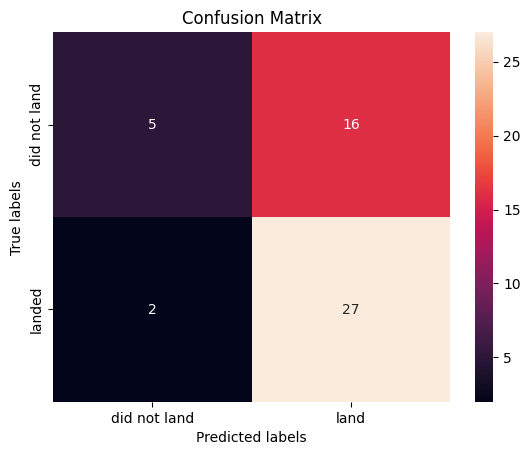

In [6]:
yhat =tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [7]:
# Logistic Regression classification algorithm
lr = LogisticRegression()

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
gridsearch_cv_lr = GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv = gridsearch_cv_lr.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
lr_best_score = logreg_cv.best_score_
print("accuracy :", lr_best_score)

lr_score = logreg_cv.score(X_test, y_test)
print(f"Logistic Regression - Accuracy using method score: {lr_score}")

tuned hyperparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.648157894736842
Logistic Regression - Accuracy using method score: 0.64


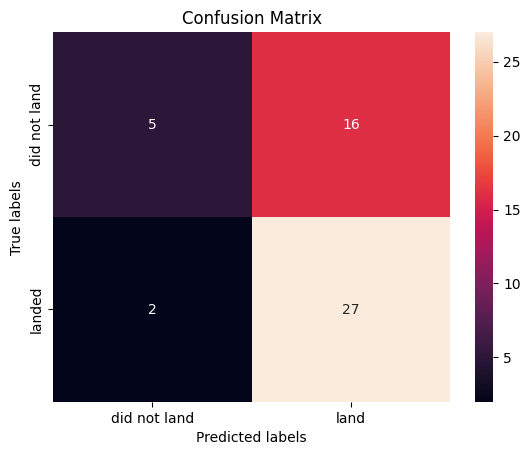

In [8]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [9]:
# K Nearest Neighbors classification algorithm
knn = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

gridsearch_cv_knn = GridSearchCV(knn, parameters, scoring='accuracy', cv=10)
knn_cv = gridsearch_cv_knn.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
knn_best_score = knn_cv.best_score_
print("accuracy :",knn_best_score)

knn_score = knn_cv.score(X_test, y_test)

print(f"KNN - Accuracy using method score: {knn_score}")

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.6126315789473684
KNN - Accuracy using method score: 0.64


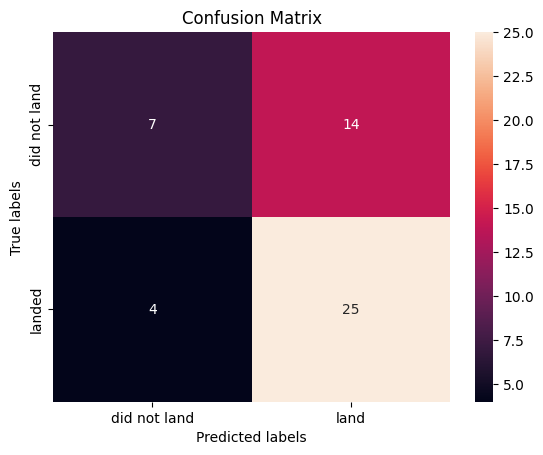

In [10]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [12]:
# XGboost Classifier
XGB = xgb.XGBClassifier()

parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
        

gridsearch_XGB = GridSearchCV(XGB, parameters, scoring='accuracy', cv=10)
XGB_cv = gridsearch_XGB.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",XGB_cv.best_params_)
XGB_best_score = XGB_cv.best_score_
print("accuracy :",XGB_best_score)

XGB_score = XGB_cv.score(X_test, y_test)
print(f"XGB - Accuracy using method score: {XGB_score}")

tuned hyperparameters :(best parameters)  {'colsample_bytree': 0.6, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 0.6}
accuracy : 0.6381578947368421


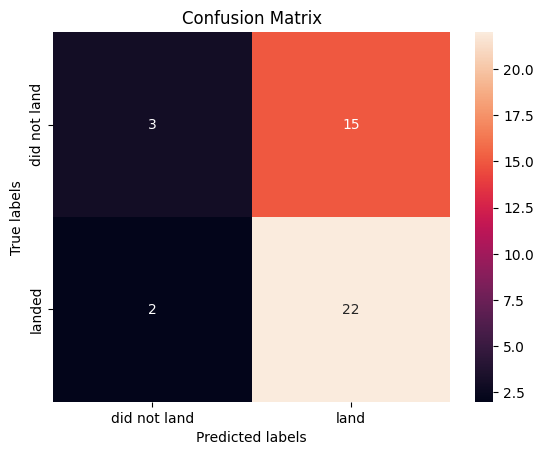

In [17]:
yhat = XGB_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

In [14]:
algorithms = ['Decision Tree', 'Logistic Regression', 'K Nearest Neighbours', 'XGB']

scores = [tree_score, lr_score, knn_score, XGB_score]

best_scores = [tree_best_score, lr_best_score, knn_best_score, XGB_best_score]

column_names = ['Algorithm', 'Accuracy Score', 'Best Score']

In [15]:
df1 = pd.DataFrame(list(zip(algorithms, scores, best_scores)),columns = column_names)
df1

,Algorithm,Accuracy Score,Best Score
0,Decision Tree,0.64,0.658684
1,Logistic Regression,0.64,0.648158
2,K Nearest Neighbours,0.64,0.612632
3,XGB,0.66,0.638158


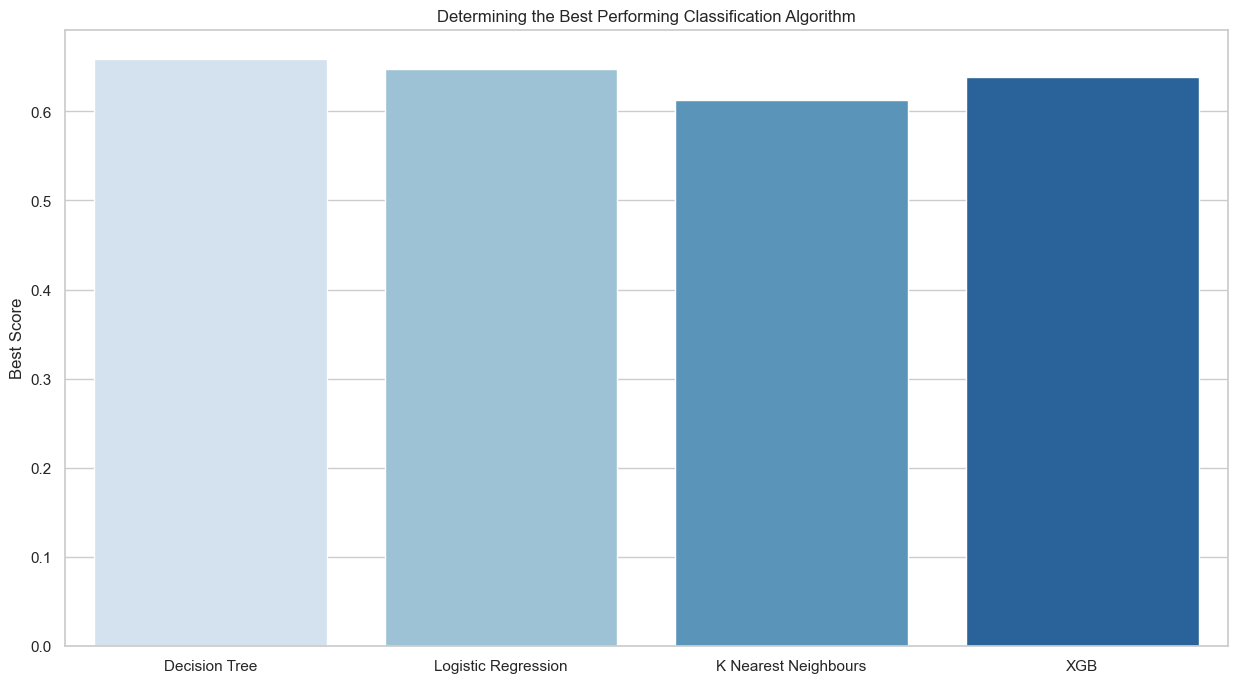

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=best_scores, palette="Blues")
plt.title("Determining the Best Performing Classification Algorithm")
plt.ylabel("Best Score")
plt.show()

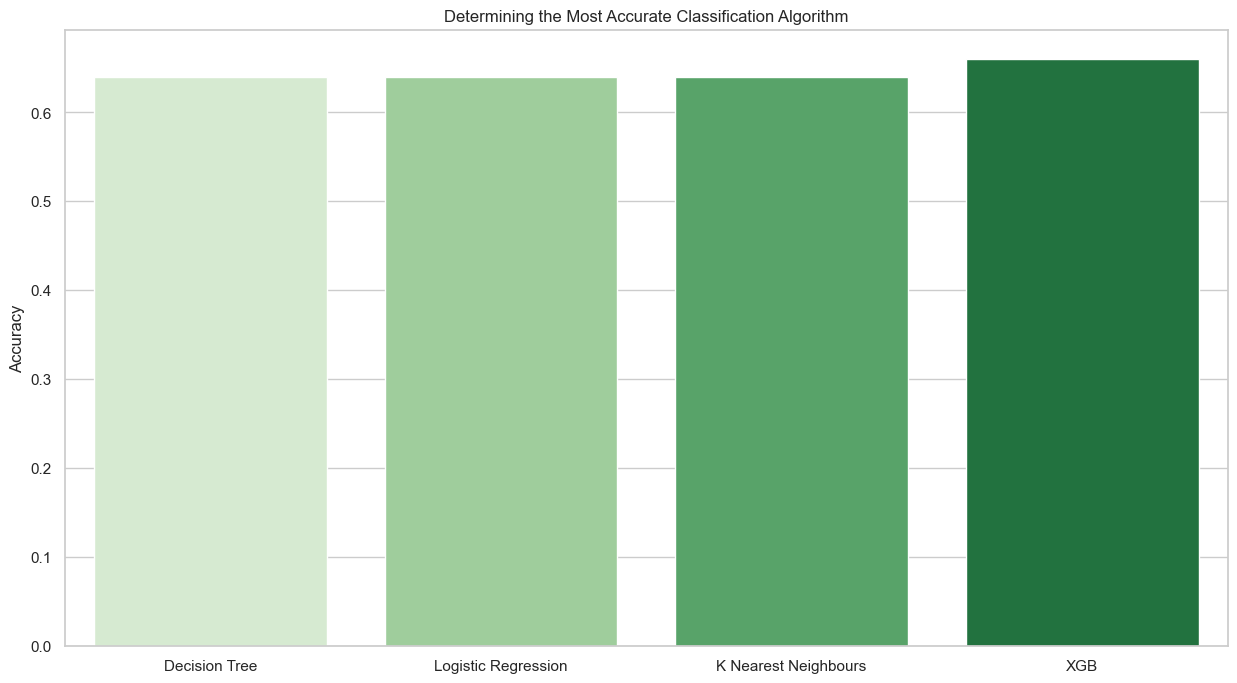

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
sns.barplot(x=algorithms, y=scores, palette="Greens")
plt.title("Determining the Most Accurate Classification Algorithm")
plt.ylabel("Accuracy")
plt.show()

In [2]:
gamelog = leaguegamelog.LeagueGameLog(season = '2022-23')
games = gamelog.get_data_frames()[0]

games = games[['TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'PLUS_MINUS']]
games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

games = games.sort_values('GAME_DATE')

games['avg_30_plus_minus'] = games.groupby('TEAM_NAME')['PLUS_MINUS'].transform(lambda x: x.rolling(30, closed='left').mean())

msk = games['MATCHUP'].str.contains('@')
games_away = games[msk]
games_home = games[~msk]

games_merged = pd.merge(games_home, games_away, on='GAME_ID', suffixes=('_home', '_away'))

games_merged['avg_30_plus_minus_diff'] = games_merged['avg_30_plus_minus_home'] - games_merged['avg_30_plus_minus_away']

games_merged[['WL_home', 'avg_30_plus_minus_diff']]

games_model = games_merged[['WL_home', 'avg_30_plus_minus_diff']].dropna()
games_model['WL_home'] = games_model['WL_home'].map({'W': 1, 'L': 0})

In [3]:
df_train, df_test = train_test_split(games_model, stratify=games_model['WL_home'], test_size=0.2, random_state=7)

target = 'WL_home'
X_train = df_train.drop(columns=target)
y_train = df_train[target]

X_test = df_test.drop(columns=target)
y_test= df_test[target]

In [22]:
model_tree = tree_cv.best_estimator_
model_lr = logreg_cv.best_estimator_
model_knn = knn_cv.best_estimator_
model_xgb = XGB_cv.best_estimator_

In [23]:
dump(model_tree, 'model_nba.joblib') 
model_saved = load('model_nba.joblib') 

In [24]:
accuracy_score(y_test, model_saved.predict(X_test))

0.64

In [27]:
team_home='Boston Celtics'
team_away='Philadelphia 76ers'
msk_home = (games['TEAM_NAME'] == team_home)
games_30_home = games[msk_home].sort_values('GAME_DATE').tail(30)
games_30_home = games_30_home.dropna()
home_plus_minus = games_30_home['PLUS_MINUS'].mean()

msk_away = (games['TEAM_NAME'] == team_away)
games_30_away = games[msk_away].sort_values('GAME_DATE').tail(30)
games_30_away = games_30_away.dropna()
away_plus_minus = games_30_away['PLUS_MINUS'].mean()

games_diff = home_plus_minus - away_plus_minus
predict_home_win = model_saved.predict(np.array([[games_diff]]))[0]
predict_winning_probability = model_saved.predict_proba(np.array([[games_diff]]))[0][1]

print (games_diff)
print(predict_home_win)
print(predict_winning_probability)

2.4816176470588234
1
0.7777777777777778


C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\nadon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#team_home='Milwaukee Bucks'
#team_away='Toronto Raptors'
#team_home='Los Angeles Lakers'
#team_away='Philadelphia 76ers'
#Boston Celtics